# `ipyparallel` magics

In [1]:
import ipyparallel as ipp
rc = ipp.Client()

In [2]:
with rc[:].sync_imports():
    import numpy

importing numpy on engine(s)
got unknown result: 05d7cec8-912387fc506b2f40c1471286
got unknown result: fa6fddcf-779a7f98c12df80a46c1e51f


In [3]:
%px a = numpy.random.rand(2,2)

In [4]:
%px numpy.linalg.eigvals(a)

Out[0:2]: array([0.65462266, 1.13932216])

Out[1:2]: array([ 0.83473139, -0.29322661])

Out[2:2]: array([0.05028953, 1.30003731])

Out[3:2]: array([0.99612347, 0.42574895])

In [5]:
%px print('hi')

[stdout:0] hi
[stdout:1] hi
[stdout:2] hi
[stdout:3] hi


In [6]:
%px %pylab inline

[stdout:0] Populating the interactive namespace from numpy and matplotlib
[stdout:1] Populating the interactive namespace from numpy and matplotlib
[stdout:2] Populating the interactive namespace from numpy and matplotlib
[stdout:3] Populating the interactive namespace from numpy and matplotlib


[output:0]

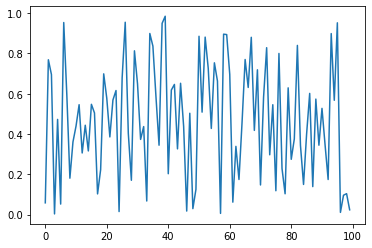

[output:1]

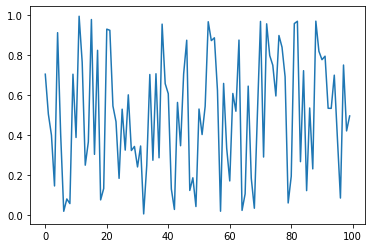

[output:2]

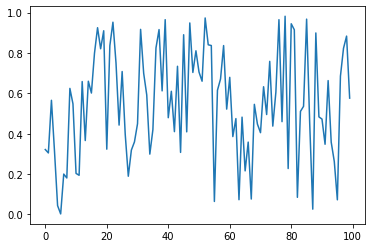

[output:3]

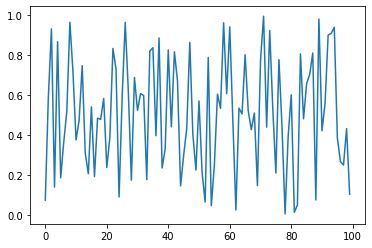

Out[0:5]: [<matplotlib.lines.Line2D at 0x1102e2b10>]

Out[1:5]: [<matplotlib.lines.Line2D at 0x10ea7f110>]

Out[2:5]: [<matplotlib.lines.Line2D at 0x113d70d50>]

Out[3:5]: [<matplotlib.lines.Line2D at 0x10fee7fd0>]

In [7]:
%px plot(rand(100))

## `%%px` cell magic 

`--targets`, `--block` and `--noblock`

In [8]:
%%px --targets ::2
print('I am even')

[stdout:0] I am even
[stdout:2] I am even


In [9]:
%%px --targets 1
print('I am number 1')

I am number 1


In [10]:
%%px
print('still all by default')

[stdout:0] still all by default
[stdout:1] still all by default
[stdout:2] still all by default
[stdout:3] still all by default


In [11]:
%%px --noblock
import time
time.sleep(1)
time.time()

<AsyncResult: execute>

In [12]:
%pxresult

Out[0:8]: 1570269717.543805

Out[1:8]: 1570269717.54598

Out[2:8]: 1570269717.5485692

Out[3:7]: 1570269717.548548

In [13]:
%%px --block --group-outputs=engine
import numpy as np
A = np.random.random((2,2))
ev = numpy.linalg.eigvals(A)
print(ev)
ev.max()

[stdout:0] [-0.68780518  0.74951568]


[output:0]

Out[0:9]: 0.7495156792444352

[stdout:1] [0.75691299 1.08526474]


[output:1]

Out[1:9]: 1.0852647415435284

[stdout:2] [-0.2153414   1.46736661]


[output:2]

Out[2:9]: 1.467366609797983

[stdout:3] [0.55698336 0.13540831]


[output:3]

Out[3:8]: 0.5569833627025539

## `%pxresult`

In [14]:
dview = rc[:]

In [15]:
dview.block = False
%px print('hi')
%pxresult

[stdout:0] hi
[stdout:1] hi
[stdout:2] hi
[stdout:3] hi
[stdout:0] hi
[stdout:1] hi
[stdout:2] hi
[stdout:3] hi


## `%autopx`

In [16]:
dview.block=True

In [17]:
%autopx

%autopx enabled


In [18]:
max_evals = []
for i in range(100):
     a = numpy.random.rand(10,10)
     a = a+a.transpose()
     evals = numpy.linalg.eigvals(a)
     max_evals.append(evals[0].real)

In [19]:
print("Average max eigenvalue is: %f" % (sum(max_evals)/len(max_evals)))

[stdout:0] Average max eigenvalue is: 10.209420
[stdout:1] Average max eigenvalue is: 10.214184
[stdout:2] Average max eigenvalue is: 10.071618
[stdout:3] Average max eigenvalue is: 10.132674


## `%pxconfig`

In [3]:
%pxconfig --block
%px print('hi')

[stdout:0] hi
[stdout:1] hi
[stdout:2] hi
[stdout:3] hi


In [4]:
%pxconfig --targets ::2
%px print('hi')

[stdout:0] hi
[stdout:2] hi


In [5]:
%pxconfig --noblock
%px print('hi')

<AsyncResult: execute>

In [6]:
%pxresult

[stdout:0] hi
[stdout:2] hi


## Multiple active views

Magics of `ipyparallel` are assigned to certain `DirectView` objects. However, the active view can be changed by calling the `activate()` method on a view.

In [3]:
even = rc[::2]
even.activate()
%px print('hi')

<AsyncResult: execute>

In [4]:
even.block = True
%px print('hi')

got unknown result: 98a3ad5c-00fa7f40e334c8a4186d5be5
[stdout:0] hi
[stdout:2] hi


If you activate the view, you can also specify a suffix so that it can be assigned to a whole range of magics without replacing the existing ones.

In [5]:
rc.activate()

<DirectView all>

In [6]:
even.activate('_even')
%px print('hi')

[stdout:0] hi
[stdout:1] hi
[stdout:2] hi
[stdout:3] hi


In [7]:
%px_even print("We aren’t odd!")

[stdout:0] We aren’t odd!
[stdout:2] We aren’t odd!


This suffix is used at the end of all magics, e.g.`%autopx_even`, `%pxresult_even` etc.

For the sake of simplicity, also `Client`  has an `activate()` method that creates a `DirectView` with `block = True`, activates it, and returns the new view.

The initial magics that are registered when a client is created are the result of the call `rc.activate()` with standard arguments.

## Engines as kernel

Engines are actually the same object as IPython kernels, with the only exception that engines connect to a controller, while regular kernels bind their sockets directly to connections to their front end.

Sometimes you will connect your front end directly to an engine for debugging or analysing the interaction more directly. You can also do this by instructing the engine to bind its kernel to your frontend as well:

In [ ]:
%px import ipyparallel as ipp; ipp.bind_kernel()
%px %qtconsole

> **Note:** Be careful with this statement, as it starts as many QtConsoles as there are engines available.

Alternatively, you can also display the connection information and determine how you can establish a connection to the engines, depending on where they live and where you are:

In [ ]:
%px %connect_info